In [5]:
import pandas as pd
import numpy as np
import scipy.stats as ss
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
%matplotlib inline 

In [6]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [8]:
def BS_Call(S,K,r,T,v,d=0):
    d1 = (np.log(float(S)/K)+((r-d)+v*v/2.)*T)/(v*np.sqrt(T))
    d2 = d1-v*np.sqrt(T)
    return S*np.exp(-d*T)*ss.norm.cdf(d1)-K*np.exp(-r*T)*ss.norm.cdf(d2)



In [9]:
def BS_Put(Flag,S,K,r,T,v,d=0):
    d1 = (np.log(float(S)/K)+((r-d)+v*v/2.)*T)/(v*np.sqrt(T))
    d2 = d1-v*np.sqrt(T)
    return K*np.exp(-r*T)*ss.norm.cdf(-d2)-S*np.exp(-d*T)*ss.norm.cdf(-d1)

In [10]:
def delta(S,T,v,K,r,d=0):
    d1 = (np.log(float(S)/K)+((r-d)+v*v/2.)*T)/(v*np.sqrt(T))
    return ss.norm.cdf(d1)

In [19]:
def vega (S, T, v, K, r, d = 0):
    d1 = (np.log(float(S)/K)+((r-d)+v*v/2.)*T)/(v*np.sqrt(T))
    return (0.01 * S * np.exp(-d * T) * ss.norm.pdf(d1) * np.sqrt(T))

In [24]:
def gamma(S, T, v, K, r, d = 0 ):
    d1 = (np.log(float(S)/K)+((r-d)+v*v/2.)*T)/(v*np.sqrt(T))
    return (np.exp(-d * T) * ss.norm.pdf(d1)) / (S * v * np.sqrt(T))

In [28]:
def theta(S, T, v, K, r, d = 0 ):
    d1 = (np.log(float(S)/K)+((r-d)+v*v/2.)*T)/(v*np.sqrt(T))
    d2 = d1-v*np.sqrt(T)
    return ((np.exp(-d * T)) * S * ss.norm.pdf(d1) * v) / (2 * np.sqrt(T)) -r*K*np.exp(-r*T)*ss.norm.cdf(d2) + d*S*np.exp(-d*T)*ss.norm.cdf(d1)

In [30]:
def rho(S, T, v, K, r, d = 0 ):
    d1 = (np.log(float(S)/K)+((r-d)+v*v/2.)*T)/(v*np.sqrt(T))
    d2 = d1-v*np.sqrt(T)
    return K*T*np.exp(-r*T)*ss.norm.cdf(d2)

In [11]:
option = [BS_Call(S, K = 50, r = 0.05, T = 1, v = 0.5, d =0) for S in range (1,100)]
option_terminal = [BS_Call(S, K = 50, r = 0.05, T = 0.01, v = 0.5, d =0) for S in range (1,100)]

### Option Value

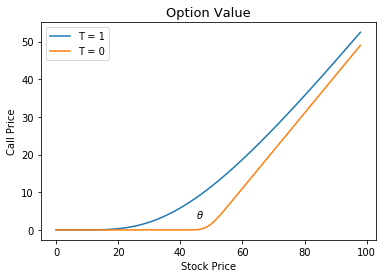

In [12]:
plt.plot(option)
plt.plot(option_terminal)
plt.ylabel("Call Price")
plt.xlabel("Stock Price")
plt.title("Option Value", fontsize = 13)
plt.legend(["T = 1", "T = 0"])
plt.text(45, 3, r'$\theta\ $')
plt.show()

In [13]:
def plot_delta(T,v):
    delta_test = [delta(S,T,v,K = 50, r = 0.05,  d =0) for S in range (10,80)]
    plt.plot(delta_test)
    plt.xlim([10,80])
    plt.xlabel("Stock Price")
    plt.title("Option Delta", fontsize = 13)
    plt.show()

interact(plot_delta, T = (0.01,1,0.1),v = (0.01,0.5))

A Jupyter Widget

<function __main__.plot_delta>

In [26]:
def plot_gamma(T,v):
    gamma_test = [gamma(S,T,v,K = 50, r = 0.05,  d =0) for S in range (10,80)]
    plt.plot(gamma_test)
    plt.xlim([10,80])
    plt.xlabel("Stock Price")
    plt.title("Option Gamma", fontsize = 13)
    plt.show()

interact(plot_gamma, T = (0.01,1,0.1),v = (0.01,0.5))

A Jupyter Widget

<function __main__.plot_gamma>

In [27]:
def plot_vega(T,v):
    vega_test = [vega(S,T,v,K = 50, r = 0.05,  d =0) for S in range (10,80)]
    plt.plot(vega_test)
    plt.xlim([10,80])
    plt.xlabel("Stock Price")
    plt.title("Option Vega", fontsize = 13)
    plt.show()

interact(plot_vega, T = (0.01,1,0.1),v = (0.01,0.5))

A Jupyter Widget

<function __main__.plot_vega>

In [29]:
def plot_theta(T,v):
    theta_test = [theta(S,T,v,K = 50, r = 0.05,  d =0) for S in range (10,80)]
    plt.plot(theta_test)
    plt.xlim([10,80])
    plt.xlabel("Stock Price")
    plt.title("Option Theta", fontsize = 13)
    plt.show()

interact(plot_theta, T = (0.01,1,0.1),v = (0.01,0.5))

A Jupyter Widget

<function __main__.plot_theta>

In [31]:
def plot_rho(T,v):
    rho_test = [rho(S,T,v,K = 50, r = 0.05,  d =0) for S in range (10,80)]
    plt.plot(rho_test)
    plt.xlim([10,80])
    plt.xlabel("Stock Price")
    plt.title("Option Rho", fontsize = 13)
    plt.show()

interact(plot_rho, T = (0.01,1,0.1),v = (0.01,0.5))

A Jupyter Widget

<function __main__.plot_rho>